In [127]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [128]:
import sklearn
import warnings
import keras
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
from distutils.version import StrictVersion

assert StrictVersion(sklearn.__version__) >= StrictVersion('0.18.1')
assert StrictVersion(tf.__version__) >= StrictVersion('1.0.0')
assert StrictVersion(keras.__version__) >= StrictVersion('1.2.2')

print(sklearn.__version__)
print(tf.__version__)
print(keras.__version__)

0.19.1
1.1.0
2.0.8


## 1. Understading the Challenge and Prepare the Data

### Download data

Data and concept from: https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6#.i728o84ib

https://notebooks.azure.com/faq#service_restrictions 

https://notebooks.azure.com/faq#upload_data

https://notebooks.azure.com/n/xwZx1vmIroU/notebooks/Getting%20to%20your%20Data%20in%20Azure%20Notebooks.ipynb

In [129]:
!curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  1810k      0  0:00:01 --:--:--  0:00:01 4259k


In [130]:
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

In [131]:
!ls -l speed-limit-signs

total 8
drwxr-xr-x  81 shubhankar  staff  2592 Nov 22 18:45 0
drwxr-xr-x  83 shubhankar  staff  2656 Nov 22 18:45 1
drwxr-xr-x  70 shubhankar  staff  2240 Nov 22 18:45 2
drwxr-xr-x  55 shubhankar  staff  1760 Nov 22 18:45 3
drwxr-xr-x  43 shubhankar  staff  1376 Nov 22 18:45 4
drwxr-xr-x  59 shubhankar  staff  1888 Nov 22 18:45 5
-rw-r--r--   1 shubhankar  staff   380 Nov 23 13:37 README.md


In [132]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

In [133]:
!ls speed-limit-signs/0

00000.ppm 00010.ppm 00020.ppm 00030.ppm 00040.ppm 00050.ppm 00060.ppm 00070.ppm
00001.ppm 00011.ppm 00021.ppm 00031.ppm 00041.ppm 00051.ppm 00061.ppm 00071.ppm
00002.ppm 00012.ppm 00022.ppm 00032.ppm 00042.ppm 00052.ppm 00062.ppm 00072.ppm
00003.ppm 00013.ppm 00023.ppm 00033.ppm 00043.ppm 00053.ppm 00063.ppm 00073.ppm
00004.ppm 00014.ppm 00024.ppm 00034.ppm 00044.ppm 00054.ppm 00064.ppm 00074.ppm
00005.ppm 00015.ppm 00025.ppm 00035.ppm 00045.ppm 00055.ppm 00065.ppm 00075.ppm
00006.ppm 00016.ppm 00026.ppm 00036.ppm 00046.ppm 00056.ppm 00066.ppm 00076.ppm
00007.ppm 00017.ppm 00027.ppm 00037.ppm 00047.ppm 00057.ppm 00067.ppm 00077.ppm
00008.ppm 00018.ppm 00028.ppm 00038.ppm 00048.ppm 00058.ppm 00068.ppm 00078.ppm
00009.ppm 00019.ppm 00029.ppm 00039.ppm 00049.ppm 00059.ppm 00069.ppm


### Analyse and Prepare Image Data

In [134]:
import os
import skimage.data

def load_data(data_dir):
    """
    Loads a data set and returns two lists:
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent tha images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in two lists, labels and images
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.ppm')]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [135]:
# Load datasets.
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
images, labels = load_data(data_dir)

In [136]:
len(set(labels)), len(images)

(6, 379)

In [137]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """
    Display the first image of each label.
    """
    unique_labels = set(labels)
    plt.figure(figsize=(10,5))
    label_count = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(1,6,label_count)
        plt.axis('off')
        plt.title('Label {} ({})'.format(label, labels.count(label)))
        label_count += 1
        plt.imshow(image)
    plt.show()

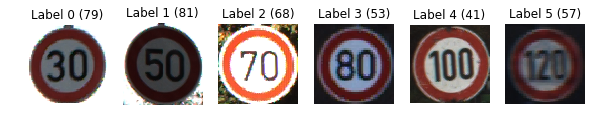

In [138]:
display_images_and_labels(images, labels)

In [139]:
for image in images[:5]:
    print("shape: {}, min: {}, max: {}".format(image.shape, image.min(), image.max()))

shape: (64, 65, 3), min: 0, max: 255
shape: (46, 46, 3), min: 42, max: 255
shape: (30, 29, 3), min: 24, max: 255
shape: (27, 27, 3), min: 50, max: 255
shape: (47, 47, 3), min: 14, max: 227


In [140]:
import skimage.transform

# Resizze images
images64 = [skimage.transform.resize(image, (64,64)) for image in images]

In [141]:
for image in images64[:5]:
    print("shape: {}, min: {}, max: {}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.01381740196078481, max: 1.0
shape: (64, 64, 3), min: 0.16470588235294117, max: 1.0
shape: (64, 64, 3), min: 0.09411764705882353, max: 1.0
shape: (64, 64, 3), min: 0.19607843137254902, max: 1.0
shape: (64, 64, 3), min: 0.07121414483762364, max: 0.8678947897518385


In [142]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))

## 2. Choosing the right architecture

### Training a simple Keras model

In [143]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

In [144]:
y

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

#### Starting with one fully connected layer and a softmax output

In [145]:
# https://keras.io/getting-started/functional-api-guide/
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# This returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(256, activation='relu')(inputs)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)

In [146]:
model.input_shape

(None, 64, 64, 3)

In [147]:
model.output_shape

(None, 6)

#### Keras Models need to be compiled (to TensorFloe in our case) before usage

In [148]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#### Optimizers: RMSprop seems to be most advanced, but not scientifically published

<img src="opt1.gif",width=600,height=600>

<img src="opt2.gif",width=600,height=600>

https://cs231n.github.io/neural-networks-3/#ada

First lets make a sanity check of the architecture, will it be sufficient? To do so try to overfit it with a very small set of data:
http://cs231n.github.io/neural-networks-3/#sanitycheck

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
# http://cs231n.github.io/neural-netwroks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=4)

In [151]:
# We are only interested in the training data (0.5 % of ~400 = ~20)
X_train.shape, y_train.shape

((18, 64, 64, 3), (18, 6))

In [152]:
# Smaller batch sizes might lead to overfitting: https://twitter.com/tomordonez/status/854832345823707137?s=03
model.fit(X_train, y_train, nb_epoch=50, batch_size=100)

Epoch 1/50
18/18 [==============================] - 0s - loss: 1.7975 - acc: 0.1667
Epoch 2/50
18/18 [==============================] - 0s - loss: 11.0774 - acc: 0.2778
Epoch 3/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 4/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 5/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 6/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 7/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 8/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 9/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 10/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 11/50
18/18 [==============================] - 0s - loss: 12.5363 - acc: 0.2222
Epoch 12/50
18/18 [==============================] - 0s - loss: 

#### Nope, not good, stuck at low accuracy: if we can not even perfectly match the very small data, probably not a good model. Let's try 4 times as many neurons, because it might work:

http://cs231n.github.io/neural-networks-1/#power

In [153]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# This returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(1024, activation='relu')(inputs)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=50, batch_size=100)

Epoch 1/50
18/18 [==============================] - 1s - loss: 1.7864 - acc: 0.3889
Epoch 2/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 3/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 4/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 5/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 6/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 7/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 8/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 9/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 10/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 11/50
18/18 [==============================] - 0s - loss: 11.6408 - acc: 0.2778
Epoch 12/50
18/18 [==============================] - 0s - loss: 


#### Same problem, what about a second hidden later, because practically more than one layer makes training feasible in the first place

In [154]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# This returns a tensor
inputs = Input(shape=(64, 64, 3))

x = Dense(512, activation='relu')(inputs)
x = Dense(512, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
18/18 [==============================] - 2s - loss: 1.7852 - acc: 0.0556
Epoch 2/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 3/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 4/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 5/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 6/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 7/30
18/18 [==============================] - 1s - loss: 11.6408 - acc: 0.2778
Epoch 8/30
18/18 [==============================] - 1s - loss: 11.6408 - acc: 0.2778
Epoch 9/30
18/18 [==============================] - 1s - loss: 11.6408 - acc: 0.2778
Epoch 10/30
18/18 [==============================] - 1s - loss: 11.6408 - acc: 0.2778
Epoch 11/30
18/18 [==============================] - 2s - loss: 11.6408 - acc: 0.2778
Epoch 12/30
18/18 [==============================] - 1s - loss: 


#### Should be better and depending on out luck, with same amount of neurons, but we can actually overfit

In [155]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

18/18 [==============================] - 0s


(11.640847206115723, 0.27777779102325439)

#### But on unknown data of course we totally suck

In [156]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

361/361 [==============================] - 13s    


(12.71240556141016, 0.21052631581011241)

#### Bad result for the test data was to be expected, because we were overfitting on purpose, now take a more reasonable split and try not to overfit too much

#### Split training (80%) from test (20%) (and make it reproduceable)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#### Training now takes far longer, as we have far more data, even on a very powerful machine, this might take upto 15  minutes, do not run this unless you have time and a big machine

In [158]:
from keras.models import Model
from keras.layers import Dense, Flatten, Input

# This returns a tensor
inputs = Input(shape=(64,64,3))

# Reduced to make this terminate in a resonable amount of time
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
# x = Dense(512, activation='relu')(inputs)
# x = Dense(512, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=30, batch_size=100)

Epoch 1/30
303/303 [==============================] - 4s - loss: 7.9411 - acc: 0.1914     
Epoch 2/30
303/303 [==============================] - 4s - loss: 12.7136 - acc: 0.2112     
Epoch 3/30
303/303 [==============================] - 3s - loss: 12.7136 - acc: 0.2112     
Epoch 4/30
303/303 [==============================] - 3s - loss: 12.7136 - acc: 0.2112     
Epoch 5/30
303/303 [==============================] - 4s - loss: 12.7136 - acc: 0.2112     
Epoch 6/30
303/303 [==============================] - 4s - loss: 12.7136 - acc: 0.2112     
Epoch 7/30
303/303 [==============================] - 4s - loss: 12.7136 - acc: 0.2112     
Epoch 8/30
303/303 [==============================] - 5s - loss: 12.7136 - acc: 0.2112     
Epoch 9/30
303/303 [==============================] - 5s - loss: 12.7136 - acc: 0.2112     
Epoch 10/30
303/303 [==============================] - 4s - loss: 12.7136 - acc: 0.2112     
Epoch 11/30
303/303 [==============================] - 4s - loss: 12.7136 - acc:

In [196]:
# If accuracy is still not close to 1, run this as many times as necessary
model.fit(X_train, y_train, nb_epoch=10, batch_size=100)

Epoch 1/10
303/303 [==============================] - 10s - loss: 0.2711 - acc: 0.9142    
Epoch 2/10
303/303 [==============================] - 10s - loss: 0.2256 - acc: 0.9307    
Epoch 3/10
303/303 [==============================] - 10s - loss: 0.2000 - acc: 0.9241    
Epoch 4/10
303/303 [==============================] - 10s - loss: 0.1737 - acc: 0.9373    
Epoch 5/10
303/303 [==============================] - 10s - loss: 0.3948 - acc: 0.9010    
Epoch 6/10
303/303 [==============================] - 9s - loss: 0.4514 - acc: 0.8812     
Epoch 7/10
303/303 [==============================] - 10s - loss: 0.1042 - acc: 0.9736    
Epoch 8/10
303/303 [==============================] - 10s - loss: 0.1410 - acc: 0.9604    
Epoch 9/10
303/303 [==============================] - 10s - loss: 0.2616 - acc: 0.9208    
Epoch 10/10
303/303 [==============================] - 10s - loss: 0.1260 - acc: 0.9604    


In [197]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

303/303 [==============================] - 3s     


(0.016394363894517667, 1.0)

In [198]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

76/76 [==============================] - 1s     


(0.16089332574292234, 0.96052631892656026)

#### This takes a lot of time to train, and still sucks on test data, can we do better?
### 3. Convolutional Neural Networks
### Turns out we can use a standard CNN model with many more layers, but far less neurons
#### Layout of a typical CNN

<img src="convnet-layoyt.jpeg",width=600,height=600>
http://cs231n.github.io/convolutional-networks/

### Classic VGG like architecture

<ul>
<li>we use VGG like architecture</li>
<li>based on https://arxiv.org/abs/1409.1556</li>
<li>basic idea: sequential, deep, small convolutional filters, use dropouts to reduce overfitting</li>
<li>16/19 layers are typical</li>
<li>we choose less layers, because we have limited resources</li>
</ul>

In [199]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D

#### Input Layer: Not strictly speaking a real layer, just interface to input

In [200]:
# Input tensor for a 3-channel 64x64 imge
inputs = Input(shape=(64,64,3))

#### Convolutional Blocks: Cascading many Convolutional Layers having down sampling in between

<img src="cnn.jpeg",width=600,height=600>
http://cs231n.github.io/convolutional-networks/#conv

In [201]:
# One black of convolutional layers

# 32 filters with a 4x4 kernel, outputs 64x64x32 tensor
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(inputs)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)

#### Example of a Convolution
##### Original Image
<img src="dog.png",width=100,height=100>
##### Many convolutional filters applied over all channels

<img src="dog-conv1.png",width=600,height=600>
http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
#### Downsampling Layer: Reduces data sizes and risk of overfitting
<img src="pool.jpeg",width=600,height=600>
<img src="maxpool.jpeg",width=600,height=600>
http://cs231n.github.io/convolutional-networks/#pool

In [202]:
# Max pooling with 2x2 window, reducing data to a fourth, reduces risk of overfitting
x = MaxPooling2D(pool_size=(2,2))(x)

In [203]:
# Drops 25% of all nodes at training (but not for test.prediction), also reduces risk of overfitting
x = Dropout(0.25)(x)
# http://cs231n.github.io/neural-networks-2/#reg

In [204]:
# One more block
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

#### Last Two Layers are typically again standard

In [205]:
x = Flatten()(x)
# Fully connected, 256 nodes
x = Dense(256, activation='relu')(x)
x = Dropout(0.50)(x)

# Softmax activation, 6 categories
predictions = Dense(6, activation='softmax')(x)

In [206]:
# This creates a model  that includes the Input layer and three dense layers
model = Model(input=inputs, output=predictions)
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [208]:
# model.fit(X_train, y_train, nb_epoch=50, batch_size=100)
# Should rather be 50 epochs, but we want it to finish soon and maybe add more cycles if needed
model.fit(X_train, y_train, nb_epoch=50, batch_size=100)

Epoch 1/50
303/303 [==============================] - 9s - loss: 1.6732 - acc: 0.2838     
Epoch 2/50
303/303 [==============================] - 9s - loss: 3.2115 - acc: 0.2112     
Epoch 3/50
303/303 [==============================] - 10s - loss: 1.7078 - acc: 0.2805    
Epoch 4/50
303/303 [==============================] - 10s - loss: 1.6734 - acc: 0.2541    
Epoch 5/50
303/303 [==============================] - 11s - loss: 1.7633 - acc: 0.2805    
Epoch 6/50
303/303 [==============================] - 10s - loss: 1.7083 - acc: 0.2475    
Epoch 7/50
303/303 [==============================] - 10s - loss: 1.7040 - acc: 0.2937    
Epoch 8/50
303/303 [==============================] - 10s - loss: 1.6505 - acc: 0.2772    
Epoch 9/50
303/303 [==============================] - 10s - loss: 1.6164 - acc: 0.3135    
Epoch 10/50
303/303 [==============================] - 10s - loss: 1.9626 - acc: 0.2640    
Epoch 11/50
303/303 [==============================] - 10s - loss: 1.6300 - acc: 0.2805  

In [209]:
# Again, if accuracy is still not close to 1, run this as many times as necessary 
model.fit(X_train, y_train, nb_epoch=5, batch_size=100)

Epoch 1/5
303/303 [==============================] - 10s - loss: 0.1433 - acc: 0.9505    
Epoch 2/5
303/303 [==============================] - 10s - loss: 0.0379 - acc: 0.9967    
Epoch 3/5
303/303 [==============================] - 10s - loss: 0.0299 - acc: 0.9934    
Epoch 4/5
303/303 [==============================] - 10s - loss: 0.0486 - acc: 0.9934    
Epoch 5/5
303/303 [==============================] - 10s - loss: 0.0482 - acc: 0.9868    


<img src="acc.png",width=600,height=600>
<img src="loss.png",width=600,height=600>
https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tensorboard/README.md

### 4. Validation

In [210]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

303/303 [==============================] - 4s     


(0.0015863761486483296, 1.0)

In [211]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

76/76 [==============================] - 1s     


(0.14242938553032122, 0.97368421052631582)

### Might be upto 95% accuracy on Test Data!
#### Let us try a few random samples on the test data

In [212]:
import random

# Pick 10 random images for test data set
random.seed(3)
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = [X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

In [213]:
sample_labelssslslselselselselsels

[array([ 0.,  0.,  1.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.,  0.,  0.,  0.,  0.,  0.])]

In [214]:
# That is a tad hard to read, just choose the category

ground_truth = np.argmax(sample_labels, axis=1)
ground_truth

array([2, 0, 0, 4, 1, 1, 0, 3, 5, 0])

In [215]:
# Now make the prediction for the sample imputs
X_sample = np.array(sample_images)
prediction = model.predict(X_sample)

In [216]:
# Saftmax predictions would be even harder to read, again just choose the highest category

predicted_categories = np.argmax(prediction, axis=1)
predicted_categories

array([2, 0, 0, 4, 0, 1, 0, 3, 5, 0])

In [217]:
# Display the predictions and the ground truth visually
def display_prediction(images, true_labels, predicted_labels):
    fig = plt.figure(figsize=(10,10))
    for i in range(len(true_labels)):
        truth = true_labels[i]
        prediction = predicted_labels[i]
        plt.subplot(5,2,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(80, 10, "Truth:        {}\nPrediction: {}".format(truth, prediction), 
                 fontsize=12, color=color)
        plt.imshow(images[i])

#### Visualizing where we were right(might be upto 10 out of 10)

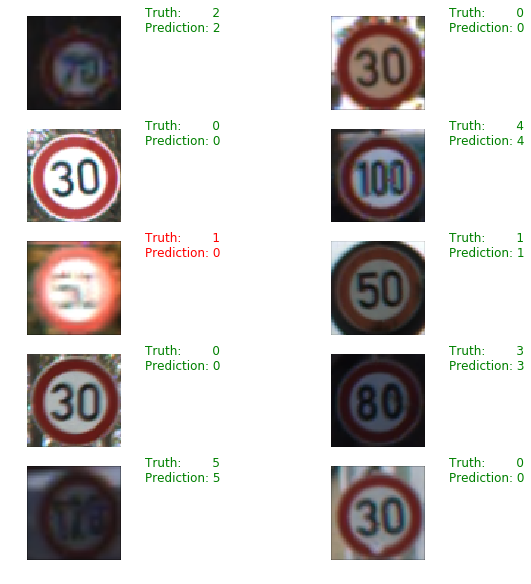

In [218]:
display_prediction(sample_images, ground_truth, predicted_categories)